### Importing the Libraries 

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
import tensorflow as tf 
import keras 
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import cv2

In [ ]:
test=zipfile.ZipFile('test.zip','r')
test.extractall()

### Displaying  up the Path of the images 

In [11]:

def show_rand(x,dir='train'):
    if len(x)==30:
        f,ax=plt.subplots(6,5,figsize=(10,10))
        for i,file_name in enumerate(x):
            img=cv2.imread(os.path.join(dir,file_name))
            img=cv2.resize(img,(256,256))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            ax[i//5][i%5].imshow(img,aspect='auto')
            ax[i//5][i%5].set_xticks([]); ax[i//5][i%5].set_yticks([])
            
        plt.show()

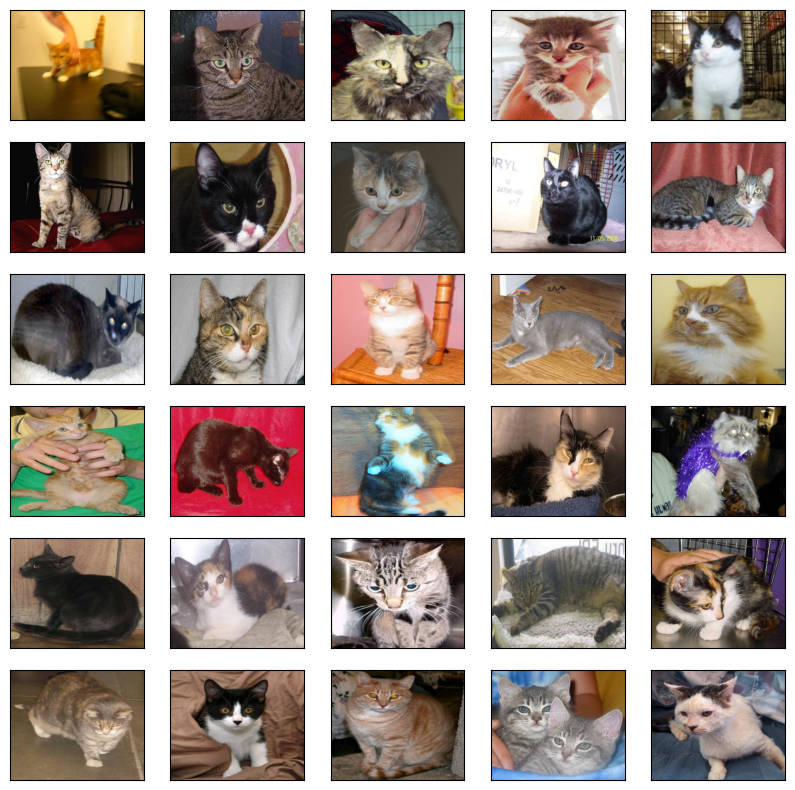

In [12]:
show_rand(os.listdir('train')[:30],dir='train')

In [13]:
import tensorflow as tf 
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential


In [14]:
from tensorflow import keras

main_directory = ''


batch_size = 32
image_size = (256, 256)


train_ds = keras.utils.image_dataset_from_directory(
    directory=os.path.join(main_directory, 'train'),
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,  
    subset='training',  
    seed=42  
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory=os.path.join(main_directory, 'train'),
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,  
    subset='validation',  
    seed=42  
)




Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [15]:
train_ds.class_names

['cats', 'dogs']

In [16]:
def process_data(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label
train_ds=train_ds.map(process_data)
validation_ds=validation_ds.map(process_data)

In [17]:
# create CNN model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5


625/625 [==============================] - 1133s 2s/step - loss: 0.6891 - accuracy: 0.6471 - val_loss: 0.5634 - val_accuracy: 0.7072
Epoch 2/5
625/625 [==============================] - 1111s 2s/step - loss: 0.5179 - accuracy: 0.7459 - val_loss: 0.4893 - val_accuracy: 0.7612
Epoch 3/5
625/625 [==============================] - 1058s 2s/step - loss: 0.4380 - accuracy: 0.7997 - val_loss: 0.4914 - val_accuracy: 0.7406
Epoch 4/5
625/625 [==============================] - 1022s 2s/step - loss: 0.3550 - accuracy: 0.8421 - val_loss: 0.8743 - val_accuracy: 0.6588
Epoch 5/5
625/625 [==============================] - 968s 2s/step - loss: 0.2808 - accuracy: 0.8779 - val_loss: 0.5349 - val_accuracy: 0.8148


In [26]:
from keras.models import load_model
predict_model=load_model('model.h5')

In [27]:
predict_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

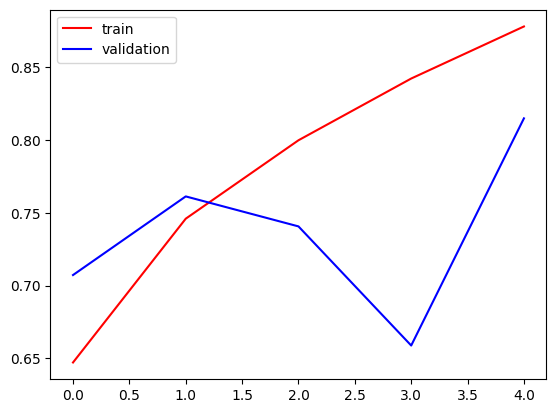

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

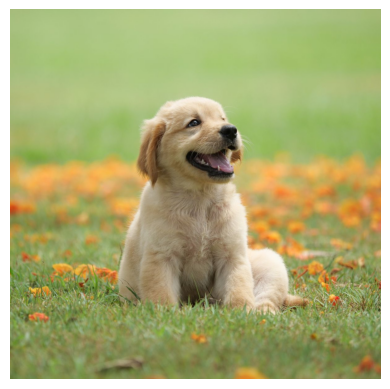

In [37]:
import matplotlib.pyplot as plt
import cv2

image_path = 'hi.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()


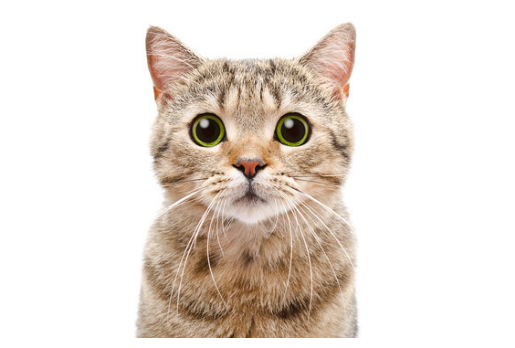

In [39]:
import matplotlib.pyplot as plt
import cv2

image_path = 'cat.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 53ms/step


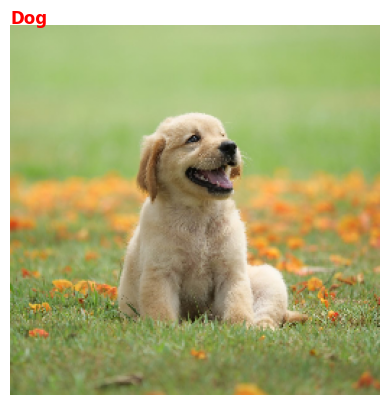

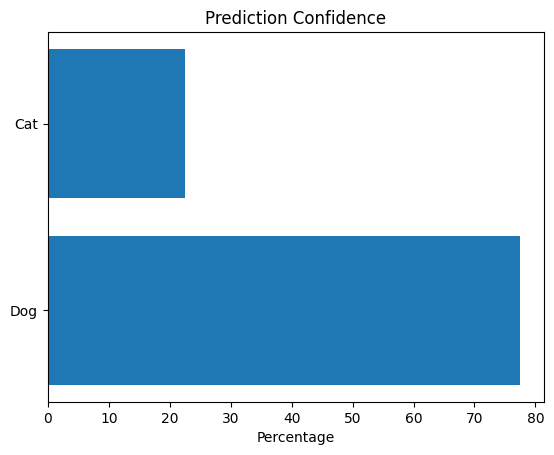

In [50]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'hi.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Preprocess the image
img = cv2.resize(img, (256, 256))
img = img / 255.0
img = img.reshape(1, 256, 256, 3)

# Predict the image
prediction = predict_model.predict(img)
predicted_class = 'Cat' if prediction[0][0] < 0.5 else 'Dog'

# Display the image
plt.imshow(img[0])
plt.axis('off')

# Annotate the image with the predicted class
plt.text(0, img.shape[0], predicted_class, color='red', fontsize=12, weight='bold', ha='left', va='bottom')

plt.show()
# Display the horizontal bar graph
plt.figure()
labels = ['Dog', 'Cat']
percentages = [prediction[0][0] * 100, (1 - prediction[0][0]) * 100]
plt.barh(labels, percentages)
plt.xlabel('Percentage')
plt.title('Prediction Confidence')

plt.show()







1/1 [==============================] - 0s 33ms/step


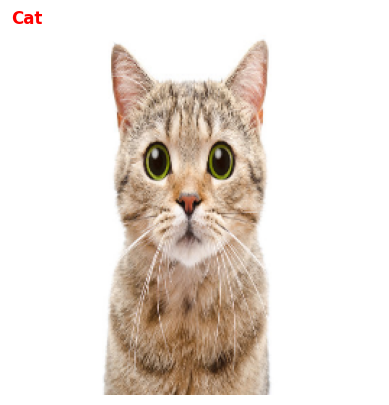

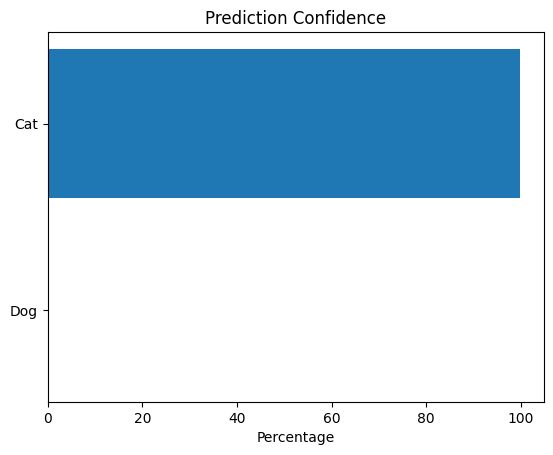

In [51]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'cat.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Preprocess the image
img = cv2.resize(img, (256, 256))
img = img / 255.0
img = img.reshape(1, 256, 256, 3)

# Predict the image
prediction = predict_model.predict(img)
predicted_class = 'Cat' if prediction[0][0] < 0.5 else 'Dog'

# Display the image
plt.imshow(img[0])
plt.axis('off')

# Annotate the image with the predicted class
plt.text(0, img.shape[0], predicted_class, color='red', fontsize=12, weight='bold', ha='left', va='bottom')

plt.show()
# Display the horizontal bar graph
plt.figure()
labels = ['Dog', 'Cat']
percentages = [prediction[0][0] * 100, (1 - prediction[0][0]) * 100]
plt.barh(labels, percentages)
plt.xlabel('Percentage')
plt.title('Prediction Confidence')

plt.show()







In [35]:
import pickle 
with open('model.pkl','wb') as file:
    pickle.dump(predict_model,file)

### Hence the Model Has been successfully tested  